# Week 1: Set Theory, Relations and Functions

**Course:** Mathematics for Data Science I (BSMA1001)  
**Week:** 1 of 12

## Learning Objectives
- Set operations and Venn diagrams
- Relations: reflexive, symmetric, transitive
- Functions: domain, range, composition
- Inverse functions
- Applications in data structures


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize, integrate
import sympy as sp
import warnings

# Suppress font warnings for Unicode mathematical symbols
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

np.random.seed(42)
plt.style.use('seaborn-v0_8-whitegrid')

# Configure matplotlib to handle Unicode symbols better
plt.rcParams['font.family'] = 'DejaVu Sans'

sp.init_printing()

print('✓ Libraries loaded')

✓ Libraries loaded


## 1. Set Theory Fundamentals

### What is a Set?
A **set** is a well-defined collection of distinct objects. In data science, sets help us work with unique data, remove duplicates, and perform logical operations.

### Set Notation
- **Roster form**: $A = \{1, 2, 3, 4, 5\}$
- **Set-builder form**: $A = \{x \mid x \text{ is a positive integer less than 6}\}$

### Common Sets
- **Natural numbers**: $\mathbb{N} = \{1, 2, 3, ...\}$
- **Integers**: $\mathbb{Z} = \{..., -2, -1, 0, 1, 2, ...\}$
- **Real numbers**: $\mathbb{R}$ (all numbers on number line)
- **Empty set**: $\emptyset$ or $\{\}$

### Set Operations
1. **Union** ($A \cup B$): All elements in A or B or both
2. **Intersection** ($A \cap B$): Elements common to both A and B
3. **Difference** ($A - B$): Elements in A but not in B
4. **Complement** ($A'$ or $A^c$): All elements not in A
5. **Symmetric Difference** ($A \triangle B$): Elements in A or B but not both

### Venn Diagrams
Visual representations showing relationships between sets

### Data Science Applications
- **Deduplication**: Removing duplicate records from datasets
- **Feature selection**: Finding common/unique features
- **Data filtering**: Selecting subsets based on conditions
- **User segmentation**: Identifying customer groups

In [157]:
# Python Sets - Basic Operations

# Create sets
customers_jan = {101, 102, 103, 104, 105}
customers_feb = {103, 104, 105, 106, 107}

print("January Customers:", customers_jan)
print("February Customers:", customers_feb)

# Union - All customers who purchased in Jan OR Feb
all_customers = customers_jan | customers_feb  # or customers_jan.union(customers_feb)
print(f"\nUnion (Jan ∪ Feb): {all_customers}")
print(f"Total unique customers: {len(all_customers)}")

# Intersection - Customers who purchased in BOTH months (repeat customers)
repeat_customers = customers_jan & customers_feb  # or customers_jan.intersection(customers_feb)
print(f"\nIntersection (Jan ∩ Feb): {repeat_customers}")
print(f"Repeat customers: {len(repeat_customers)}")

# Difference - Customers only in January (churned customers)
jan_only = customers_jan - customers_feb  # or customers_jan.difference(customers_feb)
print(f"\nDifference (Jan - Feb): {jan_only}")
print(f"Churned customers: {len(jan_only)}")

# Symmetric Difference - Customers in only one month (not both)
single_month = customers_jan ^ customers_feb  # or customers_jan.symmetric_difference(customers_feb)
print(f"\nSymmetric Difference (Jan △ Feb): {single_month}")
print(f"One-time customers: {len(single_month)}")

# Subset checking
subset = {103, 104}
print(f"\nIs {{103, 104}} a subset of Jan customers? {{103, 104}} ⊆ Jan: {subset.issubset(customers_jan)}")

# Real-world example: Data cleaning
raw_data = [1, 2, 2, 3, 4, 4, 5, 5, 5]
print(f"\nRaw data with duplicates: {raw_data}")
clean_data = set(raw_data)
print(f"After deduplication: {clean_data}")
print(f"Removed {len(raw_data) - len(clean_data)} duplicates")

January Customers: {101, 102, 103, 104, 105}
February Customers: {103, 104, 105, 106, 107}

Union (Jan ∪ Feb): {101, 102, 103, 104, 105, 106, 107}
Total unique customers: 7

Intersection (Jan ∩ Feb): {104, 105, 103}
Repeat customers: 3

Difference (Jan - Feb): {101, 102}
Churned customers: 2

Symmetric Difference (Jan △ Feb): {101, 102, 106, 107}
One-time customers: 4

Is {103, 104} a subset of Jan customers? {103, 104} ⊆ Jan: True

Raw data with duplicates: [1, 2, 2, 3, 4, 4, 5, 5, 5]
After deduplication: {1, 2, 3, 4, 5}
Removed 4 duplicates


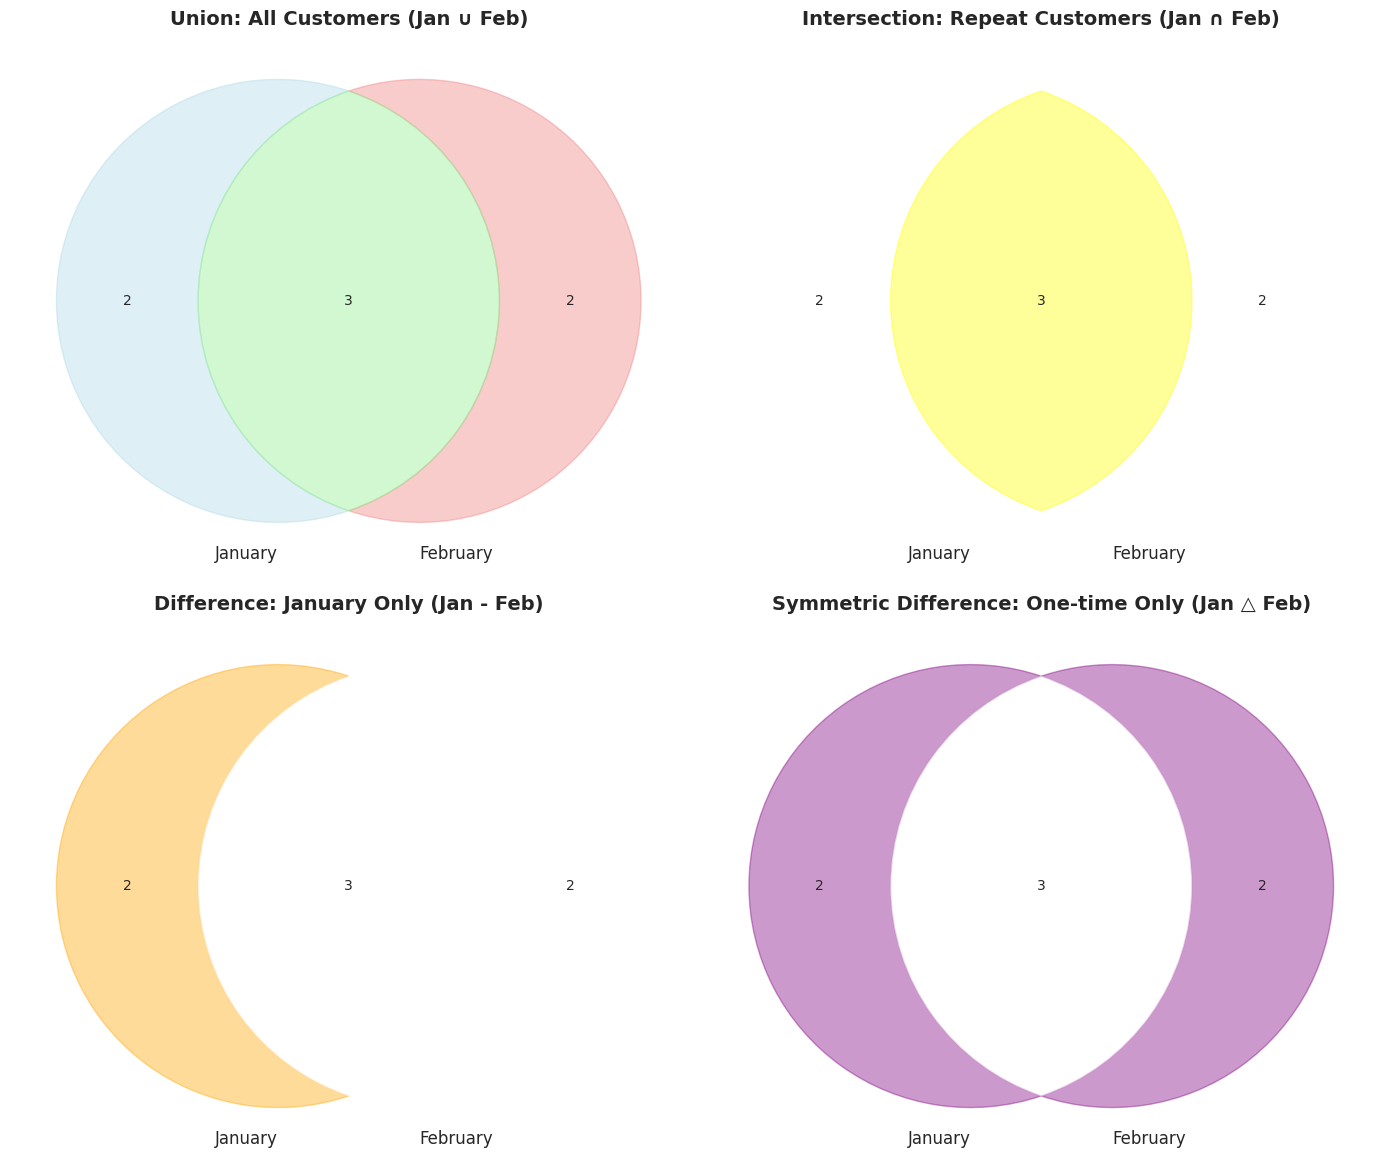

In [158]:
# Visualizing Sets with Venn Diagrams
from matplotlib_venn import venn2, venn3
import matplotlib.patches as patches

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Union
ax1 = axes[0, 0]
v1 = venn2([customers_jan, customers_feb], set_labels=('January', 'February'), ax=ax1)
v1.get_patch_by_id('10').set_color('lightblue')
v1.get_patch_by_id('01').set_color('lightcoral')
v1.get_patch_by_id('11').set_color('lightgreen')
ax1.set_title('Union: All Customers (Jan ∪ Feb)', fontsize=14, fontweight='bold')

# 2. Intersection
ax2 = axes[0, 1]
v2 = venn2([customers_jan, customers_feb], set_labels=('January', 'February'), ax=ax2)
v2.get_patch_by_id('10').set_color('white')
v2.get_patch_by_id('01').set_color('white')
v2.get_patch_by_id('11').set_color('yellow')
ax2.set_title('Intersection: Repeat Customers (Jan ∩ Feb)', fontsize=14, fontweight='bold')

# 3. Difference
ax3 = axes[1, 0]
v3 = venn2([customers_jan, customers_feb], set_labels=('January', 'February'), ax=ax3)
v3.get_patch_by_id('10').set_color('orange')
v3.get_patch_by_id('01').set_color('white')
v3.get_patch_by_id('11').set_color('white')
ax3.set_title('Difference: January Only (Jan - Feb)', fontsize=14, fontweight='bold')

# 4. Symmetric Difference
ax4 = axes[1, 1]
v4 = venn2([customers_jan, customers_feb], set_labels=('January', 'February'), ax=ax4)
v4.get_patch_by_id('10').set_color('purple')
v4.get_patch_by_id('01').set_color('purple')
v4.get_patch_by_id('11').set_color('white')
ax4.set_title('Symmetric Difference: One-time Only (Jan △ Feb)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [159]:
# Venn Diagram Insights
print("\n📊 Venn Diagram Insights:")
print(f"• Total unique customers: {len(all_customers)}")
print(f"• Customer retention rate: {len(repeat_customers)/len(customers_jan)*100:.1f}%")
print(f"• Churn rate: {len(jan_only)/len(customers_jan)*100:.1f}%")
print(f"• New customer acquisition: {len(customers_feb - customers_jan)} customers")


📊 Venn Diagram Insights:
• Total unique customers: 7
• Customer retention rate: 60.0%
• Churn rate: 40.0%
• New customer acquisition: 2 customers


## 2. Relations: Reflexive, Symmetric, Transitive

### What is a Relation?
A **relation** $R$ from set $A$ to set $B$ is a subset of the Cartesian product $A \times B$. If $(a, b) \in R$, we say "$a$ is related to $b$" and write $aRb$.

### Types of Relations

#### 1. **Reflexive Relation**
A relation $R$ on set $A$ is **reflexive** if every element is related to itself.
$$\forall a \in A: (a, a) \in R$$

**Example**: "is equal to" ($=$) is reflexive because $a = a$ for all $a$.

#### 2. **Symmetric Relation**
A relation $R$ on set $A$ is **symmetric** if whenever $a$ is related to $b$, then $b$ is related to $a$.
$$\forall a, b \in A: (a, b) \in R \Rightarrow (b, a) \in R$$

**Example**: "is sibling of" is symmetric because if A is sibling of B, then B is sibling of A.

#### 3. **Transitive Relation**
A relation $R$ on set $A$ is **transitive** if whenever $a$ is related to $b$ and $b$ is related to $c$, then $a$ is related to $c$.
$$\forall a, b, c \in A: [(a, b) \in R \land (b, c) \in R] \Rightarrow (a, c) \in R$$

**Example**: "is ancestor of" is transitive because if A is ancestor of B and B is ancestor of C, then A is ancestor of C.

#### 4. **Equivalence Relation**
A relation that is **reflexive, symmetric, and transitive** is called an **equivalence relation**.

**Example**: Equality ($=$) is an equivalence relation.

### Data Science Applications
- **Clustering**: Grouping similar data points (equivalence relations)
- **Graph Theory**: Network connections and paths (transitivity)
- **Recommendation Systems**: "Similar to" relations between items
- **Database Relations**: Foreign key relationships
- **Social Networks**: Friendship, follower relations

In [160]:
# Relations in Python - Testing Properties

# Helper functions for checking relation properties
def is_reflexive(relation, elements):
    """Check if relation is reflexive"""
    return all((x, x) in relation for x in elements)

def is_symmetric(relation):
    """Check if relation is symmetric"""
    return all((b, a) in relation for (a, b) in relation)

def is_transitive(relation):
    """Check if relation is transitive"""
    for (a, b) in relation:
        for (c, d) in relation:
            if b == c:  # If b relates to something
                if (a, d) not in relation:
                    return False
    return True

In [161]:
# Example 4: Movie Recommendations (Equivalence Relation)
print("=" * 60)
print("DATA SCIENCE APPLICATION: MOVIE RECOMMENDATIONS")
print("=" * 60)

movies = {'Action1', 'Action2', 'Comedy1', 'Comedy2', 'Drama1'}
similar_genre = {
    ('Action1', 'Action2'), ('Action2', 'Action1'),
    ('Comedy1', 'Comedy2'), ('Comedy2', 'Comedy1'),
    ('Action1', 'Action1'), ('Action2', 'Action2'),
    ('Comedy1', 'Comedy1'), ('Comedy2', 'Comedy2'),
    ('Drama1', 'Drama1')
}

print("Movies:", movies)
print("\nSimilarity Relation (same genre):")
for rel in sorted(similar_genre):
    print(f"  {rel[0]} ~ {rel[1]}")

print(f"\n✓ Reflexive? {is_reflexive(similar_genre, movies)}")
print(f"  (Each movie is similar to itself)")
print(f"✓ Symmetric? {is_symmetric(similar_genre)}")
print(f"  (If A similar to B, then B similar to A)")
print(f"✓ Transitive? {is_transitive(similar_genre)}")
print(f"  (If A~B and B~C, then A~C)")

if is_reflexive(similar_genre, movies) and is_symmetric(similar_genre) and is_transitive(similar_genre):
    print("\n🎯 This is an EQUIVALENCE RELATION!")
    print("   → Can be used for content-based filtering in recommendation systems")

DATA SCIENCE APPLICATION: MOVIE RECOMMENDATIONS
Movies: {'Drama1', 'Comedy1', 'Action2', 'Comedy2', 'Action1'}

Similarity Relation (same genre):
  Action1 ~ Action1
  Action1 ~ Action2
  Action2 ~ Action1
  Action2 ~ Action2
  Comedy1 ~ Comedy1
  Comedy1 ~ Comedy2
  Comedy2 ~ Comedy1
  Comedy2 ~ Comedy2
  Drama1 ~ Drama1

✓ Reflexive? True
  (Each movie is similar to itself)
✓ Symmetric? True
  (If A similar to B, then B similar to A)
✓ Transitive? True
  (If A~B and B~C, then A~C)

🎯 This is an EQUIVALENCE RELATION!
   → Can be used for content-based filtering in recommendation systems


In [162]:
# Example 3: "Less Than" Relation
print("=" * 60)
print("LESS THAN RELATION (<)")
print("=" * 60)

nums = {1, 2, 3, 4}
less_than = {(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)}

print(f"Elements: {nums}")
print(f"Less Than Relation: {less_than}")
print(f"\n✓ Reflexive? {is_reflexive(less_than, nums)}")
print(f"  (No: 1 is not less than 1)")
print(f"✓ Symmetric? {is_symmetric(less_than)}")
print(f"  (No: if a < b, then b is NOT < a)")
print(f"✓ Transitive? {is_transitive(less_than)}")
print(f"  (Yes: if a < b and b < c, then a < c)")

LESS THAN RELATION (<)
Elements: {1, 2, 3, 4}
Less Than Relation: {(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1, 4)}

✓ Reflexive? False
  (No: 1 is not less than 1)
✓ Symmetric? False
  (No: if a < b, then b is NOT < a)
✓ Transitive? True
  (Yes: if a < b and b < c, then a < c)


In [163]:
# Example 2: Equality Relation (Equivalence Relation)
print("=" * 60)
print("EQUALITY RELATION (Equivalence Relation)")
print("=" * 60)

numbers = {1, 2, 3}
equality = {(1, 1), (2, 2), (3, 3)}

print(f"Elements: {numbers}")
print(f"Equality Relation: {equality}")
print(f"\n✓ Reflexive? {is_reflexive(equality, numbers)}")
print(f"✓ Symmetric? {is_symmetric(equality)}")
print(f"✓ Transitive? {is_transitive(equality)}")
print("✓ Equivalence Relation? YES (all three properties hold)")

EQUALITY RELATION (Equivalence Relation)
Elements: {1, 2, 3}
Equality Relation: {(1, 1), (3, 3), (2, 2)}

✓ Reflexive? True
✓ Symmetric? True
✓ Transitive? True
✓ Equivalence Relation? YES (all three properties hold)


In [164]:
# Example 1: User Follow Relationships (Social Network)
users = {1, 2, 3, 4, 5}
follows = {(1, 2), (2, 3), (3, 4), (4, 5), (2, 1), (3, 2), (1, 1), (2, 2)}

print("=" * 60)
print("SOCIAL NETWORK FOLLOW RELATIONSHIPS")
print("=" * 60)
print(f"Users: {users}")
print(f"Follow Relationships: {follows}")

print(f"\n✓ Reflexive? {is_reflexive(follows, users)}")
print(f"  (Does everyone follow themselves?)")
print(f"\n✓ Symmetric? {is_symmetric(follows)}")
print(f"  (If A follows B, does B follow A?)")
print(f"\n✓ Transitive? {is_transitive(follows)}")
print(f"  (If A→B and B→C, does A→C?)")

SOCIAL NETWORK FOLLOW RELATIONSHIPS
Users: {1, 2, 3, 4, 5}
Follow Relationships: {(1, 2), (2, 1), (3, 4), (1, 1), (2, 3), (4, 5), (2, 2), (3, 2)}

✓ Reflexive? False
  (Does everyone follow themselves?)

✓ Symmetric? False
  (If A follows B, does B follow A?)

✓ Transitive? False
  (If A→B and B→C, does A→C?)


## 3. Functions: Domain, Range, Composition

### What is a Function?
A **function** $f: A \to B$ is a special relation where each element in set $A$ (domain) is related to exactly one element in set $B$ (codomain).

**Notation**: $f(x) = y$ means "$f$ maps $x$ to $y$"

### Key Components

#### **Domain**
The set of all possible input values (x-values).
$$\text{Domain}(f) = \{x \mid f(x) \text{ is defined}\}$$

#### **Codomain**
The set where outputs can potentially be (target set).

#### **Range**
The set of all actual output values (subset of codomain).
$$\text{Range}(f) = \{f(x) \mid x \in \text{Domain}(f)\}$$

#### **Image**
For a subset $S \subseteq A$: $f(S) = \{f(x) \mid x \in S\}$

### Types of Functions

#### 1. **Injective (One-to-One)**
Different inputs produce different outputs.
$$f(x_1) = f(x_2) \Rightarrow x_1 = x_2$$

#### 2. **Surjective (Onto)**
Every element in codomain is mapped to by some element in domain.
$$\forall y \in B, \exists x \in A: f(x) = y$$

#### 3. **Bijective (One-to-One and Onto)**
Both injective and surjective. Every element in codomain has exactly one pre-image.

### Function Composition
If $f: A \to B$ and $g: B \to C$, then composition $(g \circ f): A \to C$ is defined as:
$$(g \circ f)(x) = g(f(x))$$

**Important**: Generally, $f \circ g \neq g \circ f$ (composition is not commutative)

### Data Science Applications
- **Feature Engineering**: Transform input features (functions)
- **Neural Networks**: Chain of composed functions
- **Data Pipelines**: Function composition for ETL
- **Activation Functions**: ReLU, sigmoid, tanh
- **Loss Functions**: Map predictions to error values

In [165]:
# Define basic functions
def square(x):
    """Square function: f(x) = x²"""
    return x ** 2

def double(x):
    """Double function: g(x) = 2x"""
    return 2 * x

def add_three(x):
    """Add three: h(x) = x + 3"""
    return x + 3

def compose(f, g):
    """Returns the composition f(g(x))"""
    return lambda x: f(g(x))

In [166]:
# Example 4: Data Science Application - Feature Scaling
print("=" * 70)
print("DATA SCIENCE APPLICATION: FEATURE SCALING")
print("=" * 70)

# Raw data: house prices in different ranges
house_prices = np.array([150000, 200000, 350000, 500000, 750000])
house_sizes = np.array([1200, 1500, 2200, 3000, 4000])

print(f"\nOriginal Data:")
print(f"Prices:  {house_prices}")
print(f"Sizes:   {house_sizes}")

# Min-Max Normalization (function mapping to [0, 1])
def min_max_normalize(x):
    """Scale to range [0, 1]"""
    return (x - x.min()) / (x.max() - x.min())

# Z-Score Standardization (function mapping to mean=0, std=1)
def standardize(x):
    """Scale to mean=0, std=1"""
    return (x - x.mean()) / x.std()

prices_normalized = min_max_normalize(house_prices)
sizes_standardized = standardize(house_sizes)

print(f"\nNormalized Prices [0,1]: {prices_normalized}")
print(f"Standardized Sizes (z-score): {sizes_standardized.round(2)}")


DATA SCIENCE APPLICATION: FEATURE SCALING

Original Data:
Prices:  [150000 200000 350000 500000 750000]
Sizes:   [1200 1500 2200 3000 4000]

Normalized Prices [0,1]: [0.         0.08333333 0.33333333 0.58333333 1.        ]
Standardized Sizes (z-score): [-1.16 -0.86 -0.18  0.61  1.59]


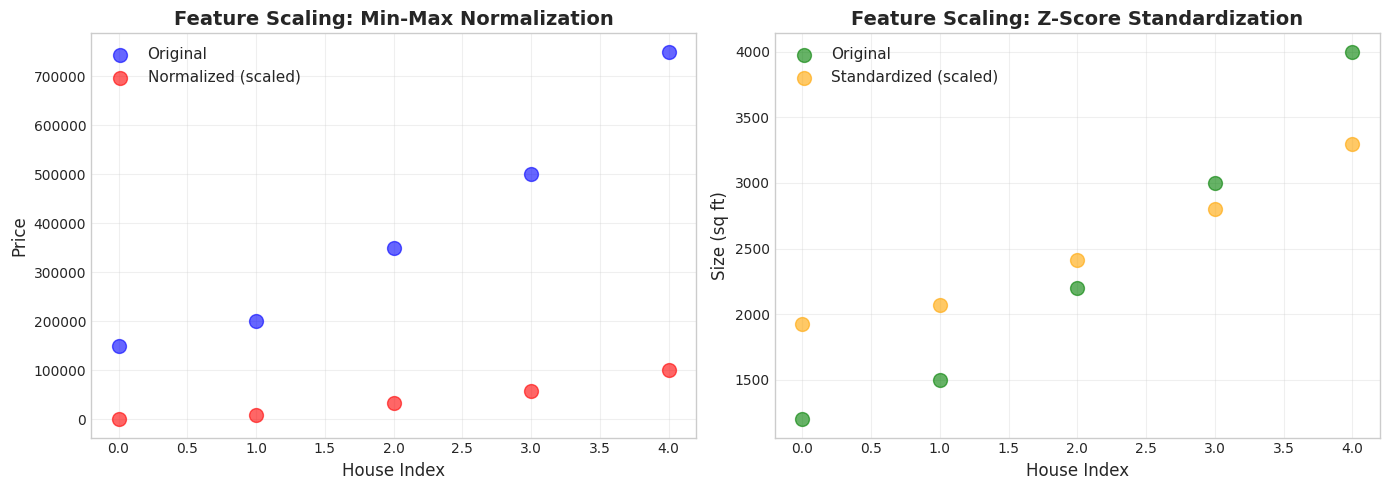


🎯 Functions are essential in data preprocessing!
   → Normalization: f(x) = (x - min)/(max - min)
   → Standardization: g(x) = (x - μ)/σ


In [167]:
# Visualize feature scaling transformations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original vs Normalized
axes[0].scatter(range(len(house_prices)), house_prices, s=100, c='blue', alpha=0.6, label='Original')
axes[0].scatter(range(len(house_prices)), prices_normalized * 100000, s=100, c='red', alpha=0.6, label='Normalized (scaled)')
axes[0].set_xlabel('House Index', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].set_title('Feature Scaling: Min-Max Normalization', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Standardization visualization
axes[1].scatter(range(len(house_sizes)), house_sizes, s=100, c='green', alpha=0.6, label='Original')
axes[1].scatter(range(len(house_sizes)), sizes_standardized * 500 + 2500, s=100, c='orange', alpha=0.6, label='Standardized (scaled)')
axes[1].set_xlabel('House Index', fontsize=12)
axes[1].set_ylabel('Size (sq ft)', fontsize=12)
axes[1].set_title('Feature Scaling: Z-Score Standardization', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Functions are essential in data preprocessing!")
print("   → Normalization: f(x) = (x - min)/(max - min)")
print("   → Standardization: g(x) = (x - μ)/σ")


In [168]:
# Example 3: Testing Function Properties (Injective)
print("=" * 70)
print("FUNCTION PROPERTIES: INJECTIVE, SURJECTIVE, BIJECTIVE")
print("=" * 70)

def is_injective_on_domain(func, domain):
    """Check if function is injective on given domain"""
    outputs = [func(x) for x in domain]
    return len(outputs) == len(set(outputs))  # No duplicate outputs

test_domain = list(range(-5, 6))

print(f"\nTest Domain: {test_domain}")
print(f"\n1. f(x) = x² is injective? {is_injective_on_domain(square, test_domain)}")
print(f"   Reason: f(-2) = f(2) = 4 (not one-to-one)")

print(f"\n2. g(x) = 2x is injective? {is_injective_on_domain(double, test_domain)}")
print(f"   Reason: Different inputs always give different outputs")

print(f"\n3. h(x) = x + 3 is injective? {is_injective_on_domain(add_three, test_domain)}")
print(f"   Reason: Linear functions are one-to-one")

FUNCTION PROPERTIES: INJECTIVE, SURJECTIVE, BIJECTIVE

Test Domain: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

1. f(x) = x² is injective? False
   Reason: f(-2) = f(2) = 4 (not one-to-one)

2. g(x) = 2x is injective? True
   Reason: Different inputs always give different outputs

3. h(x) = x + 3 is injective? True
   Reason: Linear functions are one-to-one


In [169]:
# Example 2: Function Composition
print("=" * 70)
print("FUNCTION COMPOSITION")
print("=" * 70)

# Create composed functions
f_of_g = compose(square, double)      # f(g(x)) = (2x)² = 4x²
g_of_f = compose(double, square)      # g(f(x)) = 2(x²) = 2x²

x = 3
print(f"\nLet x = {x}")
print(f"f(x) = x² = {square(x)}")
print(f"g(x) = 2x = {double(x)}")
print(f"\nf(g(x)) = f({double(x)}) = {f_of_g(x)}  (square of double)")
print(f"g(f(x)) = g({square(x)}) = {g_of_f(x)}  (double of square)")
print(f"\n⚠️  Note: f∘g ≠ g∘f (composition is NOT commutative)")


FUNCTION COMPOSITION

Let x = 3
f(x) = x² = 9
g(x) = 2x = 6

f(g(x)) = f(6) = 36  (square of double)
g(f(x)) = g(9) = 18  (double of square)

⚠️  Note: f∘g ≠ g∘f (composition is NOT commutative)


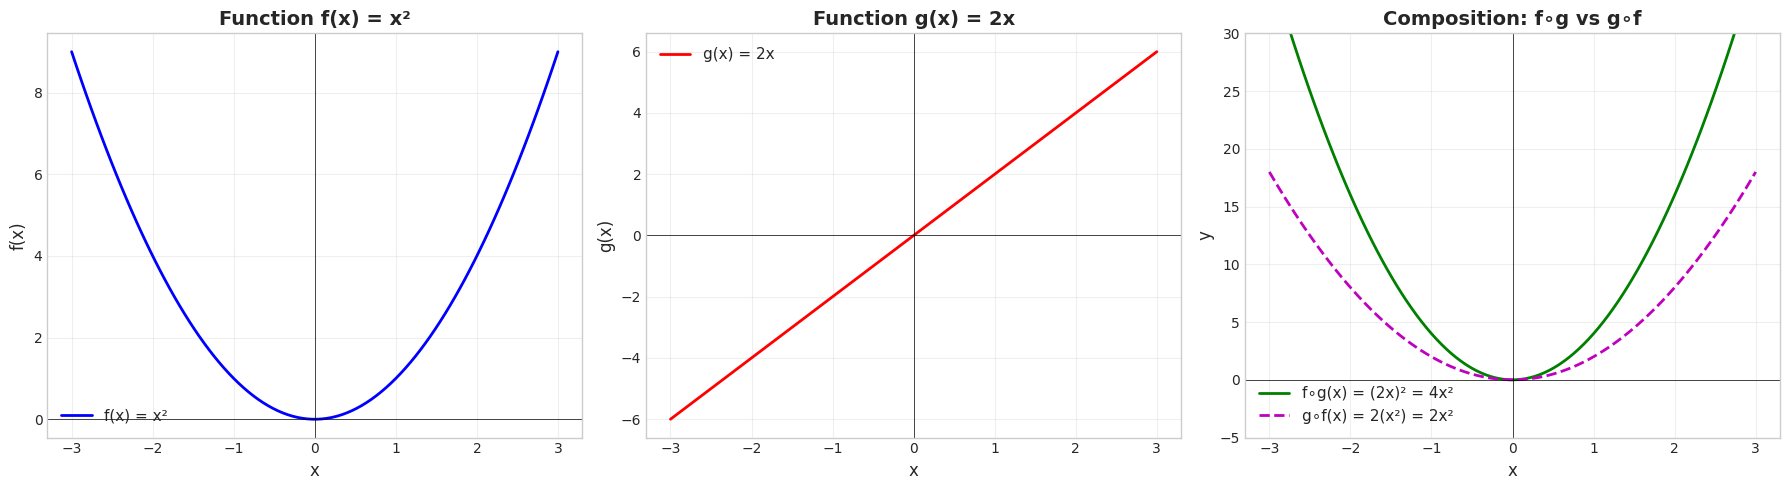

In [170]:
# Visualize function composition
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x_plot = np.linspace(-3, 3, 100)

# f(x) = x²
axes[0].plot(x_plot, [square(x) for x in x_plot], 'b-', linewidth=2, label='f(x) = x²')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Function f(x) = x²', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# g(x) = 2x
axes[1].plot(x_plot, [double(x) for x in x_plot], 'r-', linewidth=2, label='g(x) = 2x')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('g(x)', fontsize=12)
axes[1].set_title('Function g(x) = 2x', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

# Composition comparison
axes[2].plot(x_plot, [f_of_g(x) for x in x_plot], 'g-', linewidth=2, label='f∘g(x) = (2x)² = 4x²')
axes[2].plot(x_plot, [g_of_f(x) for x in x_plot], 'm--', linewidth=2, label='g∘f(x) = 2(x²) = 2x²')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('x', fontsize=12)
axes[2].set_ylabel('y', fontsize=12)
axes[2].set_title('Composition: f∘g vs g∘f', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].axhline(y=0, color='k', linewidth=0.5)
axes[2].axvline(x=0, color='k', linewidth=0.5)
axes[2].set_ylim([-5, 30])

plt.tight_layout()
plt.show()


In [171]:
# Example 1: Simple Functions
print("=" * 70)
print("FUNCTIONS IN PYTHON")
print("=" * 70)

x_values = [1, 2, 3, 4, 5]
print(f"\nInput (Domain): {x_values}")
print(f"f(x) = x²:      {[square(x) for x in x_values]}")
print(f"g(x) = 2x:      {[double(x) for x in x_values]}")
print(f"h(x) = x + 3:   {[add_three(x) for x in x_values]}")

FUNCTIONS IN PYTHON

Input (Domain): [1, 2, 3, 4, 5]
f(x) = x²:      [1, 4, 9, 16, 25]
g(x) = 2x:      [2, 4, 6, 8, 10]
h(x) = x + 3:   [4, 5, 6, 7, 8]


## 4. Inverse Functions

### What is an Inverse Function?
Given a function $f: A \to B$, its **inverse** $f^{-1}: B \to A$ reverses the mapping:
$$f^{-1}(f(x)) = x \quad \text{and} \quad f(f^{-1}(y)) = y$$

**Key Requirement**: A function must be **bijective** (one-to-one and onto) to have an inverse.

### Finding Inverse Functions

**Steps**:
1. Write $y = f(x)$
2. Solve for $x$ in terms of $y$
3. Replace $x$ with $f^{-1}(y)$ (or swap $x$ and $y$)

### Example
Find inverse of $f(x) = 2x + 3$

1. $y = 2x + 3$
2. $x = \frac{y - 3}{2}$
3. $f^{-1}(x) = \frac{x - 3}{2}$

**Verification**:
- $f(f^{-1}(x)) = f\left(\frac{x-3}{2}\right) = 2\left(\frac{x-3}{2}\right) + 3 = x$ ✓
- $f^{-1}(f(x)) = f^{-1}(2x + 3) = \frac{(2x+3) - 3}{2} = x$ ✓

### Properties of Inverse Functions

1. **Reflection Property**: Graph of $f^{-1}$ is reflection of $f$ across line $y = x$
2. **Domain/Range Swap**: 
   - Domain of $f^{-1}$ = Range of $f$
   - Range of $f^{-1}$ = Domain of $f$
3. **Composition**: $(f \circ f^{-1})(x) = x$ and $(f^{-1} \circ f)(x) = x$
4. **Inverse of Inverse**: $(f^{-1})^{-1} = f$
5. **Inverse of Composition**: $(f \circ g)^{-1} = g^{-1} \circ f^{-1}$ (order reverses!)

### Data Science Applications
- **Encoding/Decoding**: Encrypt/decrypt data
- **Normalization/Denormalization**: Scale features and reverse
- **Activation Functions**: Inverse operations in backpropagation
- **Hash Functions**: One-way functions (no inverse by design)
- **Coordinate Transformations**: Convert between coordinate systems

In [172]:
# Define function and its inverse
def f(x):
    """f(x) = 2x + 3"""
    return 2 * x + 3

def f_inverse(y):
    """f⁻¹(y) = (y - 3) / 2"""
    return (y - 3) / 2

In [173]:
# Example 3: Data Science - Normalization and Denormalization
print("=" * 70)
print("DATA SCIENCE: NORMALIZATION ↔ DENORMALIZATION")
print("=" * 70)

# Original data: test scores
original_scores = np.array([45, 67, 89, 92, 78, 56, 81, 95, 73, 88])
print(f"\nOriginal test scores: {original_scores}")
print(f"Min: {original_scores.min()}, Max: {original_scores.max()}")

# Normalization function (forward)
def normalize(data):
    """Scale to [0, 1] range"""
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val), min_val, max_val

# Denormalization function (inverse)
def denormalize(normalized_data, min_val, max_val):
    """Reverse scaling from [0, 1] to original range"""
    return normalized_data * (max_val - min_val) + min_val

# Apply normalization
normalized, min_score, max_score = normalize(original_scores)
print(f"\nNormalized scores [0,1]: {normalized.round(3)}")

# Apply denormalization (inverse operation)
recovered_scores = denormalize(normalized, min_score, max_score)
print(f"\nDenormalized (recovered): {recovered_scores.round(1)}")
print(f"✓ Successfully recovered original scores!")
print(f"  Error: {np.max(np.abs(original_scores - recovered_scores)):.10f}")


DATA SCIENCE: NORMALIZATION ↔ DENORMALIZATION

Original test scores: [45 67 89 92 78 56 81 95 73 88]
Min: 45, Max: 95

Normalized scores [0,1]: [0.   0.44 0.88 0.94 0.66 0.22 0.72 1.   0.56 0.86]

Denormalized (recovered): [45. 67. 89. 92. 78. 56. 81. 95. 73. 88.]
✓ Successfully recovered original scores!
  Error: 0.0000000000


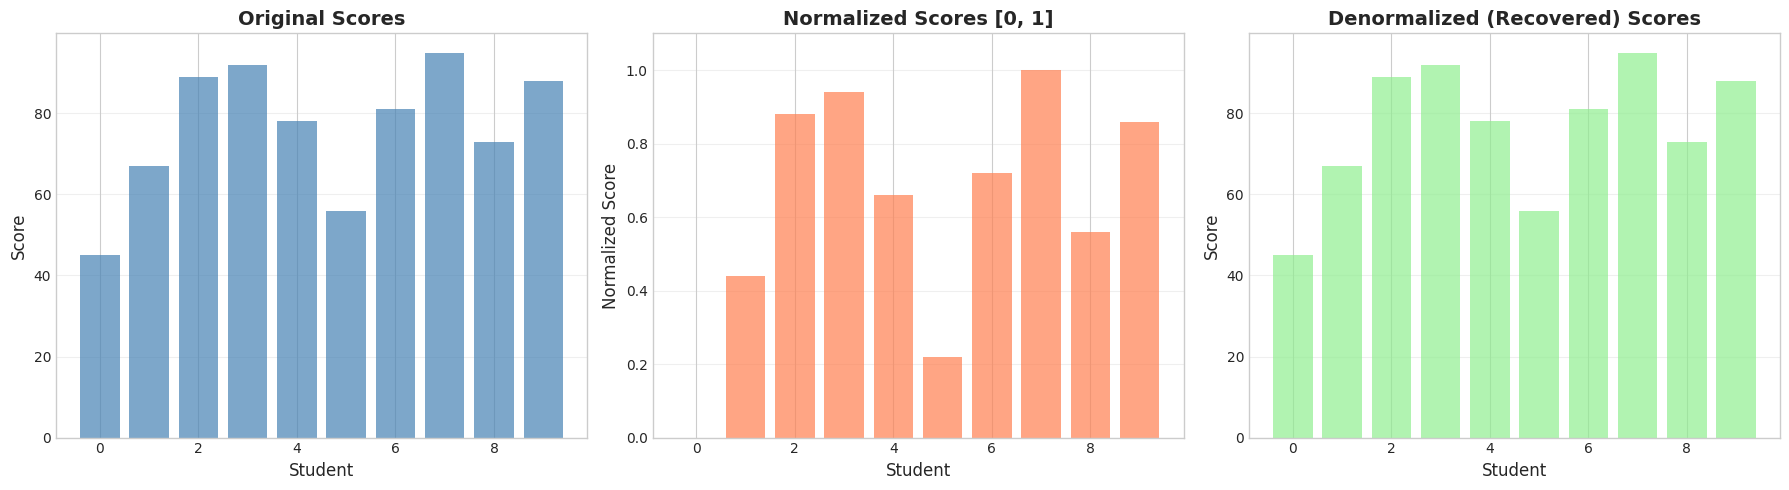


🎯 Inverse functions are crucial in data preprocessing!
   → Normalize before training
   → Denormalize for interpretable predictions


In [174]:
# Visualize normalization and denormalization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

indices = np.arange(len(original_scores))

axes[0].bar(indices, original_scores, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Student', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Original Scores', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(indices, normalized, color='coral', alpha=0.7)
axes[1].set_xlabel('Student', fontsize=12)
axes[1].set_ylabel('Normalized Score', fontsize=12)
axes[1].set_title('Normalized Scores [0, 1]', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(indices, recovered_scores, color='lightgreen', alpha=0.7)
axes[2].set_xlabel('Student', fontsize=12)
axes[2].set_ylabel('Score', fontsize=12)
axes[2].set_title('Denormalized (Recovered) Scores', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n🎯 Inverse functions are crucial in data preprocessing!")
print("   → Normalize before training")
print("   → Denormalize for interpretable predictions")


In [175]:
# Example 2: Exponential and Logarithm (Classic Inverse Pair)
print("=" * 70)
print("CLASSIC INVERSE PAIR: EXPONENTIAL AND LOGARITHM")
print("=" * 70)

def exp_func(x):
    """e^x"""
    return np.exp(x)

def log_func(x):
    """ln(x)"""
    return np.log(x)

x_test = 2.5
print(f"\nexp(x) and ln(x) are inverse functions")
print(f"\nTest with x = {x_test}:")
print(f"exp({x_test}) = {exp_func(x_test):.4f}")
print(f"ln(exp({x_test})) = {log_func(exp_func(x_test)):.4f}")
print(f"✓ Got back: {x_test}")

y_test = 10
print(f"\nTest with y = {y_test}:")
print(f"ln({y_test}) = {log_func(y_test):.4f}")
print(f"exp(ln({y_test})) = {exp_func(log_func(y_test)):.4f}")
print(f"✓ Got back: {y_test}")


CLASSIC INVERSE PAIR: EXPONENTIAL AND LOGARITHM

exp(x) and ln(x) are inverse functions

Test with x = 2.5:
exp(2.5) = 12.1825
ln(exp(2.5)) = 2.5000
✓ Got back: 2.5

Test with y = 10:
ln(10) = 2.3026
exp(ln(10)) = 10.0000
✓ Got back: 10


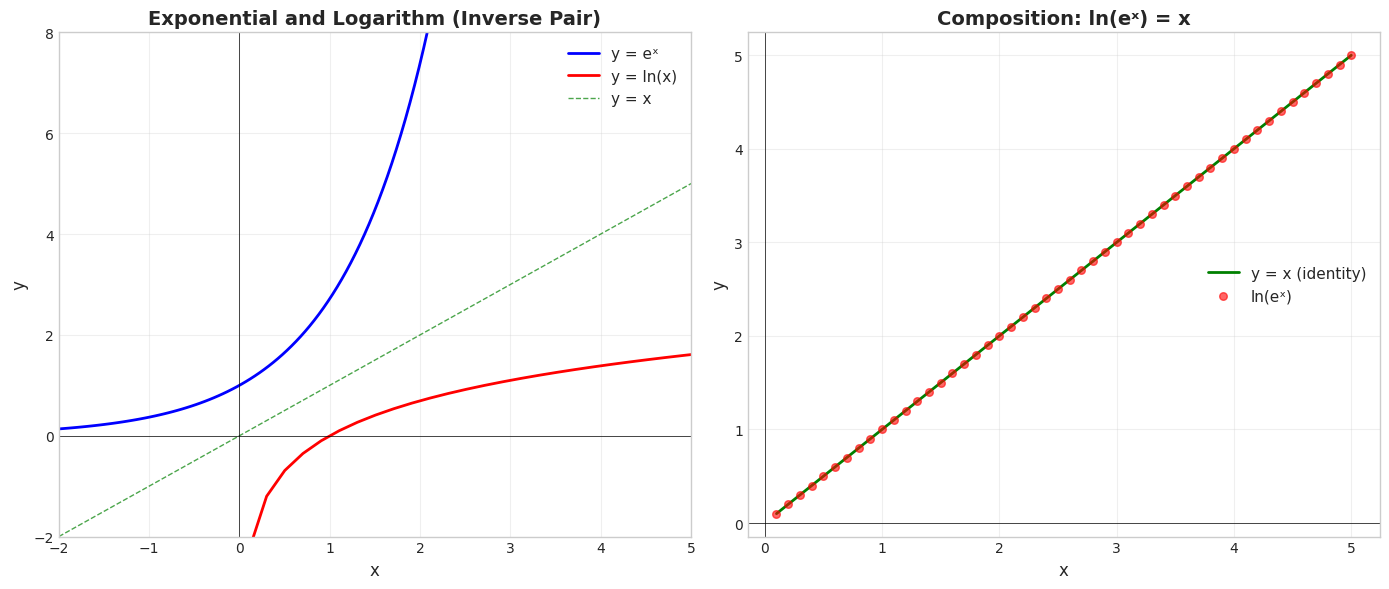

In [176]:
# Visualize exponential and logarithm
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x_exp = np.linspace(-2, 3, 100)
y_exp = exp_func(x_exp)

x_log = np.linspace(0.1, 20, 100)
y_log = log_func(x_log)

# Exponential and Logarithm
axes[0].plot(x_exp, y_exp, 'b-', linewidth=2, label='y = eˣ')
axes[0].plot(x_log, y_log, 'r-', linewidth=2, label='y = ln(x)')
axes[0].plot([-2, 20], [-2, 20], 'g--', linewidth=1, alpha=0.7, label='y = x')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Exponential and Logarithm (Inverse Pair)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)
axes[0].set_xlim([-2, 5])
axes[0].set_ylim([-2, 8])

# Composition
test_x = np.linspace(0.1, 5, 50)
identity = test_x
composed = [log_func(exp_func(x)) for x in test_x]

axes[1].plot(test_x, identity, 'g-', linewidth=2, label='y = x (identity)')
axes[1].scatter(test_x, composed, c='red', s=30, alpha=0.6, label='ln(eˣ)', zorder=3)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('Composition: ln(eˣ) = x', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


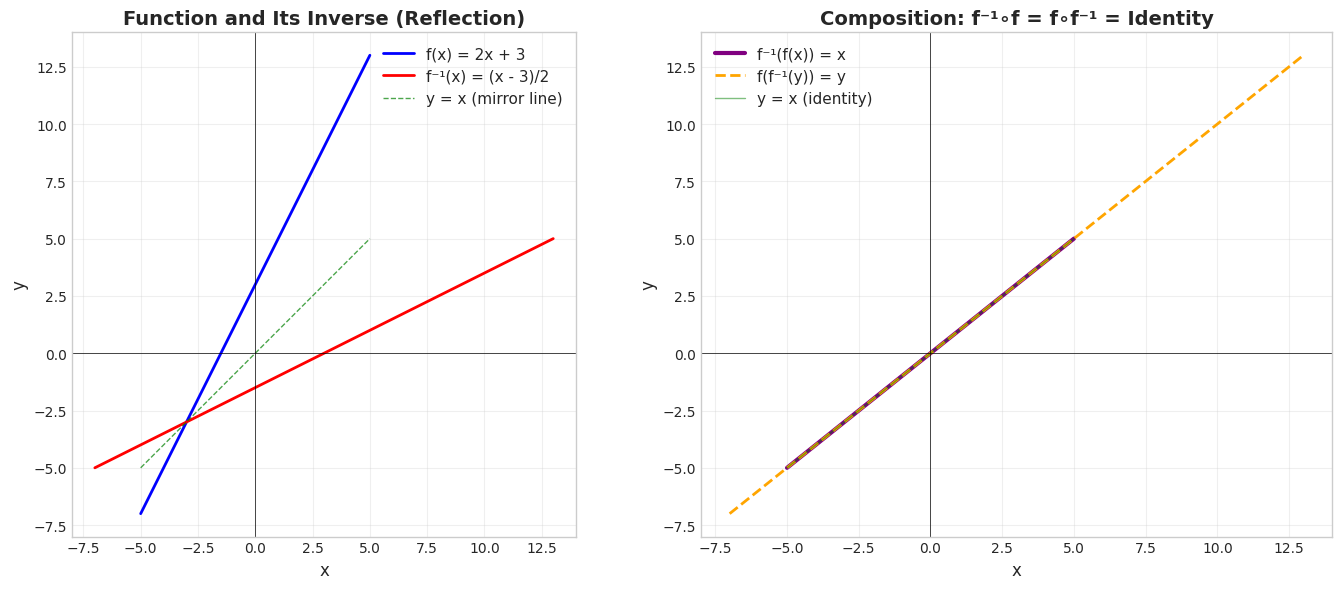

In [177]:
# Visualize function and inverse (reflection across y=x)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x_vals = np.linspace(-5, 5, 100)
y_vals = [f(x) for x in x_vals]

# Plot 1: Function and Inverse
axes[0].plot(x_vals, y_vals, 'b-', linewidth=2, label='f(x) = 2x + 3')
axes[0].plot(y_vals, x_vals, 'r-', linewidth=2, label='f⁻¹(x) = (x - 3)/2')
axes[0].plot(x_vals, x_vals, 'g--', linewidth=1, alpha=0.7, label='y = x (mirror line)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Function and Its Inverse (Reflection)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)
axes[0].set_aspect('equal')

# Plot 2: Composition (should give identity)
comp1 = [f_inverse(f(x)) for x in x_vals]
comp2 = [f(f_inverse(y)) for y in y_vals]

axes[1].plot(x_vals, comp1, 'purple', linewidth=3, label='f⁻¹(f(x)) = x')
axes[1].plot(y_vals, comp2, 'orange', linewidth=2, linestyle='--', label='f(f⁻¹(y)) = y')
axes[1].plot(x_vals, x_vals, 'green', linewidth=1, alpha=0.5, label='y = x (identity)')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('Composition: f⁻¹∘f = f∘f⁻¹ = Identity', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

In [178]:
# Example 1: Linear Function and Inverse - Verification
print("=" * 70)
print("INVERSE FUNCTIONS")
print("=" * 70)

x_test = 5
print(f"\nOriginal function: f(x) = 2x + 3")
print(f"Inverse function:  f⁻¹(y) = (y - 3) / 2")

print(f"\nTest with x = {x_test}:")
print(f"f({x_test}) = {f(x_test)}")
print(f"f⁻¹(f({x_test})) = f⁻¹({f(x_test)}) = {f_inverse(f(x_test))}")
print(f"✓ Got back original value: {x_test}")

y_test = 13
print(f"\nTest with y = {y_test}:")
print(f"f⁻¹({y_test}) = {f_inverse(y_test)}")
print(f"f(f⁻¹({y_test})) = f({f_inverse(y_test)}) = {f(f_inverse(y_test))}")
print(f"✓ Got back original value: {y_test}")

INVERSE FUNCTIONS

Original function: f(x) = 2x + 3
Inverse function:  f⁻¹(y) = (y - 3) / 2

Test with x = 5:
f(5) = 13
f⁻¹(f(5)) = f⁻¹(13) = 5.0
✓ Got back original value: 5

Test with y = 13:
f⁻¹(13) = 5.0
f(f⁻¹(13)) = f(5.0) = 13.0
✓ Got back original value: 13


## 5. Applications in Data Structures

### Sets in Data Structures

Sets are fundamental data structures that leverage mathematical set theory principles:

#### **Python Sets**
- **Implementation**: Hash table
- **Time Complexity**: O(1) for add, remove, lookup
- **Use Cases**: Membership testing, removing duplicates, set operations

#### **Database Relations**
- Tables are sets of tuples (rows)
- Relational algebra: union, intersection, difference
- SQL operations map to set operations

### Functions in Data Structures

#### **Hash Functions**
Map keys to indices in hash tables:
$$h: K \to \{0, 1, 2, ..., m-1\}$$

**Properties**:
- Deterministic: same input → same output
- Uniform distribution across hash table
- Minimal collisions

#### **Dictionaries/Maps**
Functions from keys to values:
$$f: \text{Keys} \to \text{Values}$$
- Each key maps to exactly one value (function property)
- Python `dict`, JavaScript object, Java `HashMap`

### Relations in Data Structures

#### **Graphs**
A graph $G = (V, E)$ where $E \subseteq V \times V$ (relation on vertices)

**Relation Properties**:
- **Reflexive**: Self-loops $(v, v)$
- **Symmetric**: Undirected edges (if $(u,v)$ then $(v,u)$)
- **Transitive**: Path transitivity (if $u \to v$ and $v \to w$, then path $u \to w$)

#### **Trees**
- Parent-child relation (antisymmetric, transitive)
- Ancestor-descendant relation (partial order)

### Real-World Applications

1. **Social Networks**: Friend relations, follower graphs
2. **Recommendation Systems**: Item similarity (equivalence relations)
3. **Database Joins**: Set intersections and Cartesian products
4. **Caching**: Hash functions for fast lookup
5. **File Systems**: Directory tree (hierarchical relations)

In [179]:
# Example 1: Hash Functions (Function from Keys to Indices)
print("=" * 70)
print("DATA STRUCTURES: SETS, RELATIONS, FUNCTIONS")
print("=" * 70)

print("\n1. HASH FUNCTION (Function: Key → Index)")
print("-" * 70)

# Hash function: maps keys to indices in hash table
def simple_hash(key, table_size=10):
    """Simple hash function using sum of ASCII values."""
    return sum(ord(c) for c in str(key)) % table_size

# Test with some keys
keys = ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
table_size = 10

print(f"\nHash Table Size: {table_size}")
print(f"Hash function: h(key) = (sum of ASCII values) mod {table_size}\n")

for key in keys:
    hash_value = simple_hash(key, table_size)
    print(f"  h('{key}') = {hash_value}")

print(f"\n✓ This is a function: Each key maps to exactly ONE index")
print(f"✓ This is NOT injective: Different keys may hash to same index (collisions)")


DATA STRUCTURES: SETS, RELATIONS, FUNCTIONS

1. HASH FUNCTION (Function: Key → Index)
----------------------------------------------------------------------

Hash Table Size: 10
Hash function: h(key) = (sum of ASCII values) mod 10

  h('Alice') = 8
  h('Bob') = 5
  h('Charlie') = 6
  h('David') = 8
  h('Eve') = 8

✓ This is a function: Each key maps to exactly ONE index
✓ This is NOT injective: Different keys may hash to same index (collisions)


In [180]:
# Key Takeaways from Data Structures Applications
print("\n" + "=" * 70)
print("🎯 KEY TAKEAWAYS")
print("=" * 70)
print("1. Hash functions map keys to indices (function)")
print("2. Graphs represent relations between vertices")
print("3. Dictionaries implement functions (key → value)")
print("4. Database operations use set theory (union, intersection)")
print("5. Data structures are built on mathematical foundations!")



🎯 KEY TAKEAWAYS
1. Hash functions map keys to indices (function)
2. Graphs represent relations between vertices
3. Dictionaries implement functions (key → value)
4. Database operations use set theory (union, intersection)
5. Data structures are built on mathematical foundations!


In [181]:
# Example 4: Set Operations in Database Queries
print("\n" + "=" * 70)
print("4. DATABASE OPERATIONS (Set Theory)")
print("-" * 70)

# Two tables (sets of records)
customers_online = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

customers_store = pd.DataFrame({
    'customer_id': [3, 4, 5, 6, 7],
    'name': ['Charlie', 'David', 'Eve', 'Frank', 'Grace']
})

print("\nOnline Customers:")
print(customers_online.to_string(index=False))

print("\nStore Customers:")
print(customers_store.to_string(index=False))

# Set operations on DataFrames
online_ids = set(customers_online['customer_id'])
store_ids = set(customers_store['customer_id'])

print(f"\n• Union (all customers): {online_ids | store_ids}")
print(f"  SQL: SELECT * FROM online UNION SELECT * FROM store")

print(f"\n• Intersection (both online AND store): {online_ids & store_ids}")
print(f"  SQL: SELECT * FROM online INNER JOIN store ON id")

print(f"\n• Difference (online only): {online_ids - store_ids}")
print(f"  SQL: SELECT * FROM online WHERE id NOT IN (SELECT id FROM store)")



4. DATABASE OPERATIONS (Set Theory)
----------------------------------------------------------------------

Online Customers:
 customer_id    name
           1   Alice
           2     Bob
           3 Charlie
           4   David
           5     Eve

Store Customers:
 customer_id    name
           3 Charlie
           4   David
           5     Eve
           6   Frank
           7   Grace

• Union (all customers): {1, 2, 3, 4, 5, 6, 7}
  SQL: SELECT * FROM online UNION SELECT * FROM store

• Intersection (both online AND store): {3, 4, 5}
  SQL: SELECT * FROM online INNER JOIN store ON id

• Difference (online only): {1, 2}
  SQL: SELECT * FROM online WHERE id NOT IN (SELECT id FROM store)


In [182]:
# Example 3: Dictionary (Function from Keys to Values)
print("\n" + "=" * 70)
print("3. DICTIONARY (Function: Keys → Values)")
print("-" * 70)

# Student ID → Grade (function)
student_grades = {
    101: 'A',
    102: 'B',
    103: 'A',
    104: 'C',
    105: 'B',
    106: 'A'
}

print(f"\nStudent ID → Grade (Function f: ID → Grade)")
for student_id, grade in student_grades.items():
    print(f"  f({student_id}) = {grade}")

# Each key maps to exactly ONE value (function property)
print(f"\n✓ Function Property: Each student has exactly one grade")
print(f"✓ Domain: {set(student_grades.keys())}")
print(f"✓ Range: {set(student_grades.values())}")
print(f"✓ This is NOT injective: Multiple students can have same grade")



3. DICTIONARY (Function: Keys → Values)
----------------------------------------------------------------------

Student ID → Grade (Function f: ID → Grade)
  f(101) = A
  f(102) = B
  f(103) = A
  f(104) = C
  f(105) = B
  f(106) = A

✓ Function Property: Each student has exactly one grade
✓ Domain: {101, 102, 103, 104, 105, 106}
✓ Range: {'A', 'C', 'B'}
✓ This is NOT injective: Multiple students can have same grade


In [183]:
# Example 2: Graph Representation (Relation between Vertices)
print("\n" + "=" * 70)
print("2. GRAPH (Relation between Vertices)")
print("-" * 70)

# Social network as a graph
# Vertices (set of users)
vertices = {1: 'Alice', 2: 'Bob', 3: 'Charlie', 4: 'David', 5: 'Eve'}

# Edges (relation: friendship)
edges = {(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)}

print(f"\nVertices (Users): {set(vertices.values())}")
print(f"Edges (Friendships): {len(edges)} connections")

# Check relation properties
print(f"\nRelation Properties:")

# Reflexive? (is everyone friends with themselves?)
is_reflexive_graph = all((v, v) in edges for v in vertices.keys())
print(f"  Reflexive: {is_reflexive_graph} (Not modeled: self-friendship)")

# Symmetric? (if A→B then B→A)
is_symmetric_graph = all((b, a) in edges or (a, b) in edges for (a, b) in edges)
print(f"  Symmetric: {is_symmetric_graph} (Friendship is mutual)")

# Create adjacency matrix (matrix representation of relation)
n = len(vertices)
adj_matrix = np.zeros((n, n), dtype=int)

for u, v in edges:
    adj_matrix[u-1, v-1] = 1
    adj_matrix[v-1, u-1] = 1  # Symmetric

print(f"\nAdjacency Matrix (Relation Matrix):")
print(f"  Rows/Columns represent users {list(vertices.values())}")
print(f"  Value 1 means users are friends")



2. GRAPH (Relation between Vertices)
----------------------------------------------------------------------

Vertices (Users): {'David', 'Eve', 'Bob', 'Charlie', 'Alice'}
Edges (Friendships): 5 connections

Relation Properties:
  Reflexive: False (Not modeled: self-friendship)
  Symmetric: True (Friendship is mutual)

Adjacency Matrix (Relation Matrix):
  Rows/Columns represent users ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
  Value 1 means users are friends


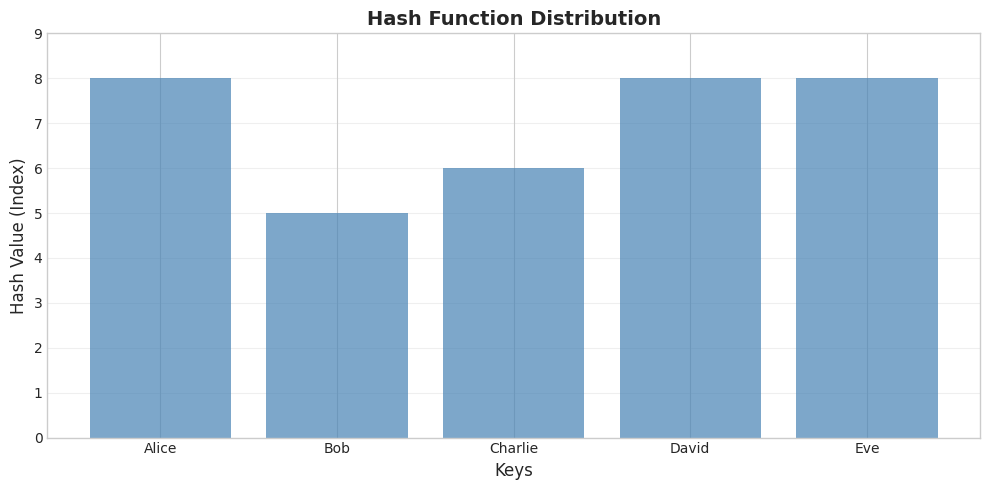

In [184]:
# Visualization: Hash distribution
hash_values = [simple_hash(key, table_size) for key in keys]

plt.figure(figsize=(10, 5))
plt.bar(range(len(keys)), hash_values, color='steelblue', alpha=0.7)
plt.xlabel('Keys', fontsize=12)
plt.ylabel('Hash Value (Index)', fontsize=12)
plt.title('Hash Function Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(len(keys)), keys)
plt.yticks(range(table_size))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## Practice Problems

### Problem 1: Set Operations and Customer Analytics

**Scenario**: An e-commerce platform tracks customer activity across three channels.

**Given**:
- Email subscribers: $E = \{1, 2, 3, 4, 5, 6, 7, 8\}$
- App users: $A = \{3, 4, 5, 6, 9, 10, 11\}$
- Website visitors: $W = \{5, 6, 7, 8, 11, 12, 13, 14\}$

**Tasks**:
1. Find customers who use all three channels: $E \cap A \cap W$
2. Find customers who use at least one channel: $E \cup A \cup W$
3. Find customers who use email but not the app: $E - A$
4. Find customers who use exactly two channels
5. Calculate engagement metrics (percentages)

---

### Problem 2: Relations and Social Network Analysis

**Scenario**: Analyze a social network with "follows" relation.

**Given**: Users $U = \{A, B, C, D, E\}$ with follows relation:
$$R = \{(A,B), (B,C), (C,D), (A,C), (D,E), (B,A)\}$$

**Tasks**:
1. Determine if the relation is reflexive, symmetric, or transitive
2. Find users who follow each other (mutual followers)
3. Find users who don't follow anyone back
4. Compute the transitive closure (indirect connections)
5. Visualize the network graph

---

### Problem 3: Function Composition and Data Pipeline

**Scenario**: Build a data transformation pipeline.

**Given three functions**:
- $f(x) = 2x + 1$ (scale and shift)
- $g(x) = x^2$ (square)
- $h(x) = \frac{1}{x}$ (reciprocal)

**Tasks**:
1. Compute $(f \circ g)(x)$ and $(g \circ f)(x)$ - are they equal?
2. Find the inverse of $f(x)$
3. Verify: $f^{-1}(f(5)) = 5$ and $f(f^{-1}(11)) = 11$
4. Apply the pipeline to data: $[1, 2, 3, 4, 5]$
5. Determine which functions are injective, surjective, or bijective
6. Visualize all functions and their compositions

In [185]:
# Practice Problems Header
print("=" * 70)
print("PRACTICE PROBLEM SOLUTIONS")
print("=" * 70)


PRACTICE PROBLEM SOLUTIONS


In [186]:
# Practice problems completion message
print("\n" + "=" * 70)
print("✓ ALL PROBLEMS SOLVED!")
print("=" * 70)



✓ ALL PROBLEMS SOLVED!


In [187]:
# PROBLEM 3: Function Composition and Data Pipeline
print("\n" + "=" * 70)
print("PROBLEM 3: Function Composition and Data Pipeline")
print("=" * 70)

# Define functions
def f(x):
    """f(x) = 2x + 1"""
    return 2 * x + 1

def g(x):
    """g(x) = x²"""
    return x ** 2

def h(x):
    """h(x) = 1/x"""
    return 1 / x if x != 0 else float('inf')

# Task 1: Composition
def f_of_g(x):
    return f(g(x))  # f(g(x)) = 2(x²) + 1 = 2x² + 1

def g_of_f(x):
    return g(f(x))  # g(f(x)) = (2x + 1)² = 4x² + 4x + 1

test_val = 3
print(f"\n1. Function Composition at x = {test_val}:")
print(f"   f(g({test_val})) = f({g(test_val)}) = {f_of_g(test_val)}")
print(f"   g(f({test_val})) = g({f(test_val)}) = {g_of_f(test_val)}")
print(f"   Are they equal? {f_of_g(test_val) == g_of_f(test_val)} (composition is NOT commutative)")

# Task 2: Inverse of f
def f_inverse(y):
    """f⁻¹(y) = (y - 1)/2"""
    return (y - 1) / 2

print(f"\n2. Inverse of f(x) = 2x + 1:")
print(f"   f⁻¹(y) = (y - 1)/2")

# Task 3: Verify inverse
x_test = 5
y_test = 11
print(f"\n3. Verification:")
print(f"   f⁻¹(f({x_test})) = f⁻¹({f(x_test)}) = {f_inverse(f(x_test))} ✓")
print(f"   f(f⁻¹({y_test})) = f({f_inverse(y_test)}) = {f(f_inverse(y_test))} ✓")

# Task 4: Apply pipeline to data
data = [1, 2, 3, 4, 5]
print(f"\n4. Data Pipeline:")
print(f"   Original data: {data}")
print(f"   After f(x) = 2x+1: {[f(x) for x in data]}")
print(f"   After g(x) = x²: {[g(x) for x in data]}")
print(f"   After f∘g: {[f_of_g(x) for x in data]}")

# Task 5: Function properties
print(f"\n5. Function Properties:")
print(f"   • f(x) = 2x+1 is bijective (linear, one-to-one and onto)")
print(f"   • g(x) = x² is NOT injective (g(-2) = g(2) = 4)")
print(f"   • h(x) = 1/x is bijective on domain ℝ\\{0}")


PROBLEM 3: Function Composition and Data Pipeline

1. Function Composition at x = 3:
   f(g(3)) = f(9) = 19
   g(f(3)) = g(7) = 49
   Are they equal? False (composition is NOT commutative)

2. Inverse of f(x) = 2x + 1:
   f⁻¹(y) = (y - 1)/2

3. Verification:
   f⁻¹(f(5)) = f⁻¹(11) = 5.0 ✓
   f(f⁻¹(11)) = f(5.0) = 11.0 ✓

4. Data Pipeline:
   Original data: [1, 2, 3, 4, 5]
   After f(x) = 2x+1: [3, 5, 7, 9, 11]
   After g(x) = x²: [1, 4, 9, 16, 25]
   After f∘g: [3, 9, 19, 33, 51]

5. Function Properties:
   • f(x) = 2x+1 is bijective (linear, one-to-one and onto)
   • g(x) = x² is NOT injective (g(-2) = g(2) = 4)
   • h(x) = 1/x is bijective on domain ℝ\0


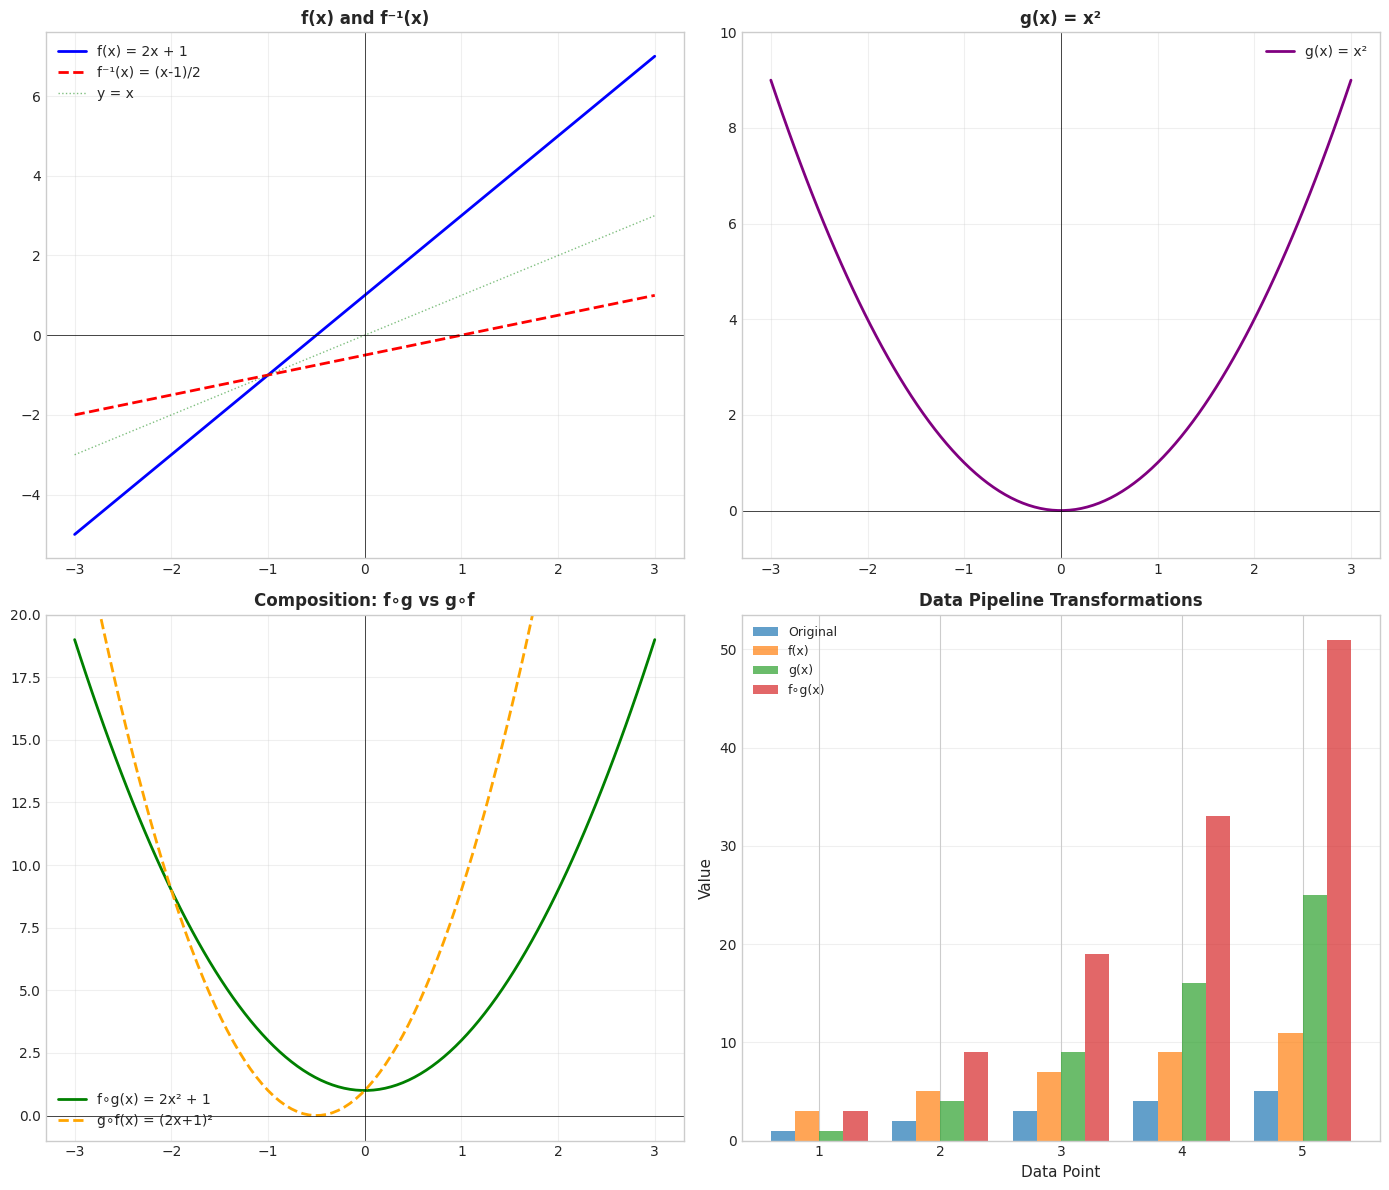

In [188]:
# Visualization: Function composition and data pipeline
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

x_vals = np.linspace(-3, 3, 100)

# f(x) = 2x + 1 and its inverse
axes[0, 0].plot(x_vals, [f(x) for x in x_vals], 'b-', linewidth=2, label='f(x) = 2x + 1')
axes[0, 0].plot(x_vals, [f_inverse(x) for x in x_vals], 'r--', linewidth=2, label='f⁻¹(x) = (x-1)/2')
axes[0, 0].plot(x_vals, x_vals, 'g:', linewidth=1, alpha=0.5, label='y = x')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=10)
axes[0, 0].set_title('f(x) and f⁻¹(x)', fontsize=12, fontweight='bold')
axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5)

# g(x) = x²
axes[0, 1].plot(x_vals, [g(x) for x in x_vals], 'purple', linewidth=2, label='g(x) = x²')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=10)
axes[0, 1].set_title('g(x) = x²', fontsize=12, fontweight='bold')
axes[0, 1].axhline(y=0, color='k', linewidth=0.5)
axes[0, 1].axvline(x=0, color='k', linewidth=0.5)
axes[0, 1].set_ylim([-1, 10])

# Composition comparison
axes[1, 0].plot(x_vals, [f_of_g(x) for x in x_vals], 'green', linewidth=2, label='f∘g(x) = 2x² + 1')
axes[1, 0].plot(x_vals, [g_of_f(x) for x in x_vals], 'orange', linewidth=2, linestyle='--', label='g∘f(x) = (2x+1)²')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=10)
axes[1, 0].set_title('Composition: f∘g vs g∘f', fontsize=12, fontweight='bold')
axes[1, 0].axhline(y=0, color='k', linewidth=0.5)
axes[1, 0].axvline(x=0, color='k', linewidth=0.5)
axes[1, 0].set_ylim([-1, 20])

# Pipeline visualization
pipeline_results = pd.DataFrame({
    'Original': data,
    'f(x)': [f(x) for x in data],
    'g(x)': [g(x) for x in data],
    'f∘g(x)': [f_of_g(x) for x in data]
})
x_pos = np.arange(len(data))
width = 0.2
axes[1, 1].bar(x_pos - 1.5*width, pipeline_results['Original'], width, label='Original', alpha=0.7)
axes[1, 1].bar(x_pos - 0.5*width, pipeline_results['f(x)'], width, label='f(x)', alpha=0.7)
axes[1, 1].bar(x_pos + 0.5*width, pipeline_results['g(x)'], width, label='g(x)', alpha=0.7)
axes[1, 1].bar(x_pos + 1.5*width, pipeline_results['f∘g(x)'], width, label='f∘g(x)', alpha=0.7)
axes[1, 1].set_xlabel('Data Point', fontsize=11)
axes[1, 1].set_ylabel('Value', fontsize=11)
axes[1, 1].set_title('Data Pipeline Transformations', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(data)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

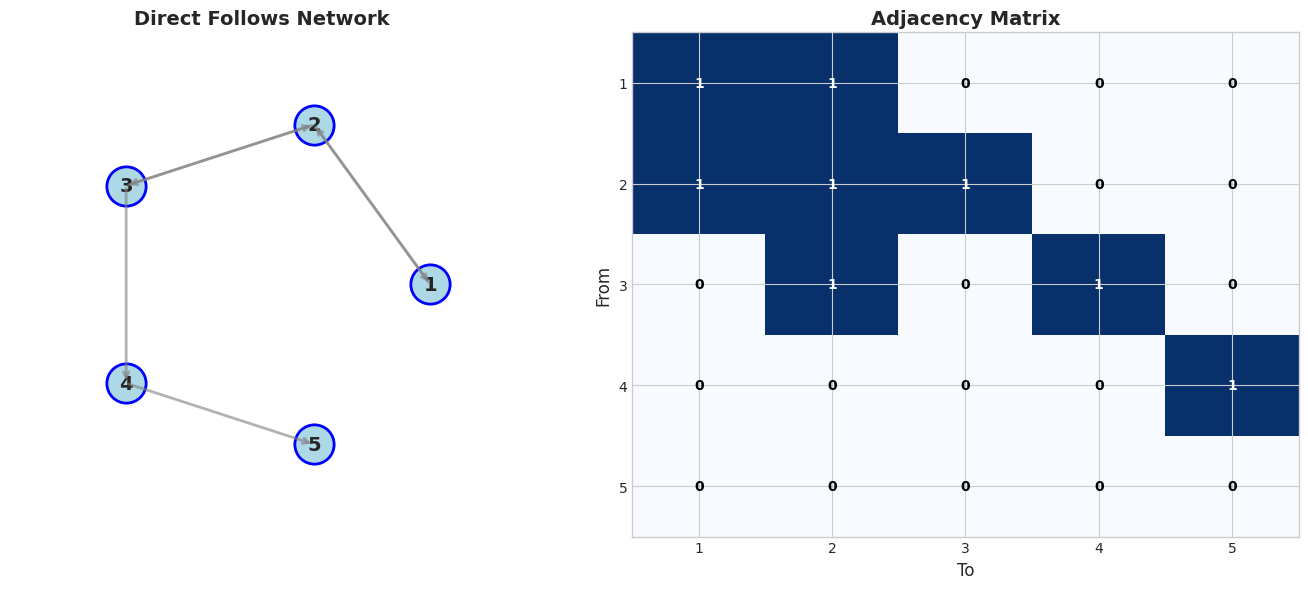

In [189]:
# Visualization: Social network graph and adjacency matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Position nodes in a circle
user_list = sorted(users)
n = len(user_list)
theta = np.linspace(0, 2*np.pi, n, endpoint=False)
pos = {user: (np.cos(t), np.sin(t)) for user, t in zip(user_list, theta)}

# Plot 1: Original network
ax1 = axes[0]
for user in user_list:
    x, y = pos[user]
    ax1.scatter(x, y, s=800, c='lightblue', edgecolors='blue', linewidths=2, zorder=3)
    ax1.text(x, y, user, ha='center', va='center', fontsize=14, fontweight='bold')

for (a, b) in follows:
    xa, ya = pos[a]
    xb, yb = pos[b]
    ax1.annotate('', xy=(xb, yb), xytext=(xa, ya),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray', alpha=0.6))

ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_aspect('equal')
ax1.axis('off')
ax1.set_title('Direct Follows Network', fontsize=14, fontweight='bold')

# Plot 2: Adjacency matrix
adj_matrix = np.zeros((n, n), dtype=int)
for (a, b) in follows:
    i, j = user_list.index(a), user_list.index(b)
    adj_matrix[i, j] = 1

ax2 = axes[1]
im = ax2.imshow(adj_matrix, cmap='Blues', aspect='auto')
ax2.set_xticks(range(n))
ax2.set_yticks(range(n))
ax2.set_xticklabels(user_list)
ax2.set_yticklabels(user_list)
ax2.set_xlabel('To', fontsize=12)
ax2.set_ylabel('From', fontsize=12)
ax2.set_title('Adjacency Matrix', fontsize=14, fontweight='bold')
for i in range(n):
    for j in range(n):
        ax2.text(j, i, str(adj_matrix[i, j]), ha='center', va='center', 
                color='white' if adj_matrix[i, j] else 'black', fontweight='bold')

plt.tight_layout()
plt.show()


In [190]:
# PROBLEM 2: Relations and Social Network Analysis
print("\n" + "=" * 70)
print("PROBLEM 2: Social Network Analysis")
print("=" * 70)

# Given
users = {'A', 'B', 'C', 'D', 'E'}
follows = {('A','B'), ('B','C'), ('C','D'), ('A','C'), ('D','E'), ('B','A')}

print(f"\nUsers: {users}")
print(f"Follows relation: {follows}")

# Task 1: Check properties
def is_reflexive_general(rel, elements):
    return all((x, x) in rel for x in elements)

def is_symmetric_general(rel):
    return all((b, a) in rel for (a, b) in rel)

def is_transitive_general(rel):
    for (a, b) in rel:
        for (c, d) in rel:
            if b == c and (a, d) not in rel:
                return False
    return True

print(f"\n1. Relation Properties:")
print(f"   • Reflexive? {is_reflexive_general(follows, users)}")
print(f"     (No: users don't follow themselves)")
print(f"   • Symmetric? {is_symmetric_general(follows)}")
print(f"     (No: A→B but B→A, but C→D without D→C)")
print(f"   • Transitive? {is_transitive_general(follows)}")
print(f"     (No: A→B, B→C but A already →C; A→C, C→D but no A→D)")

# Task 2: Mutual followers
mutual = {(a, b) for (a, b) in follows if (b, a) in follows and a < b}
print(f"\n2. Mutual followers (bidirectional): {mutual}")

# Task 3: Users who don't follow back
no_follow_back = {(a, b) for (a, b) in follows if (b, a) not in follows}
print(f"\n3. One-way follows (no reciprocation): {no_follow_back}")

# Task 4: Transitive closure
def transitive_closure(relation, elements):
    """Compute transitive closure using Warshall's algorithm"""
    closure = set(relation)
    for k in elements:
        for i in elements:
            for j in elements:
                if (i, k) in closure and (k, j) in closure:
                    closure.add((i, j))
    return closure

closure = transitive_closure(follows, users)
indirect = closure - follows
print(f"\n4. Transitive closure (all reachable paths): {len(closure)} connections")
print(f"   Direct connections: {len(follows)}")
print(f"   Indirect connections: {indirect}")



PROBLEM 2: Social Network Analysis

Users: {'C', 'D', 'E', 'A', 'B'}
Follows relation: {('B', 'A'), ('D', 'E'), ('B', 'C'), ('C', 'D'), ('A', 'C'), ('A', 'B')}

1. Relation Properties:
   • Reflexive? False
     (No: users don't follow themselves)
   • Symmetric? False
     (No: A→B but B→A, but C→D without D→C)
   • Transitive? False
     (No: A→B, B→C but A already →C; A→C, C→D but no A→D)

2. Mutual followers (bidirectional): {('A', 'B')}

3. One-way follows (no reciprocation): {('A', 'C'), ('D', 'E'), ('B', 'C'), ('C', 'D')}

4. Transitive closure (all reachable paths): 13 connections
   Direct connections: 6
   Indirect connections: {('C', 'E'), ('A', 'E'), ('A', 'A'), ('B', 'B'), ('B', 'D'), ('A', 'D'), ('B', 'E')}


In [191]:
# PROBLEM 1: Customer Engagement Analysis Using Sets
print("\n" + "=" * 70)
print("PROBLEM 1: Customer Engagement Analysis Using Sets")
print("=" * 70)

# Data: Customer IDs by channel
E = {101, 102, 103, 105, 106, 108}  # Email subscribers
A = {102, 103, 104, 106, 107}        # App users
W = {103, 105, 106, 108, 109}        # Website visitors

print(f"\nCustomer Engagement by Channel:")
print(f"• Email (E): {E}")
print(f"• App (A): {A}")
print(f"• Website (W): {W}")

# Task 1: All three channels
all_three = E & A & W
print(f"\n1. Customers using ALL three channels (E ∩ A ∩ W): {all_three}")

# Task 2: At least one channel
at_least_one = E | A | W
print(f"\n2. Customers using AT LEAST one channel (E ∪ A ∪ W): {at_least_one}")
print(f"   Total unique customers: {len(at_least_one)}")

# Task 3: Email but not app
email_not_app = E - A
print(f"\n3. Email subscribers NOT using app (E - A): {email_not_app}")

# Task 4: Exactly two channels
email_app_only = (E & A) - W
email_web_only = (E & W) - A
app_web_only = (A & W) - E
exactly_two = email_app_only | email_web_only | app_web_only
print(f"\n4. Customers using EXACTLY two channels: {exactly_two}")
print(f"   E & A only: {email_app_only}")
print(f"   E & W only: {email_web_only}")
print(f"   A & W only: {app_web_only}")

# Task 5: Engagement metrics
total_customers = len(at_least_one)
print(f"\n5. Engagement Metrics:")
print(f"   • Email engagement: {len(E)/total_customers*100:.1f}%")
print(f"   • App engagement: {len(A)/total_customers*100:.1f}%")
print(f"   • Website engagement: {len(W)/total_customers*100:.1f}%")
print(f"   • Multi-channel users: {len(exactly_two | all_three)/total_customers*100:.1f}%")
print(f"   • Highly engaged (all 3): {len(all_three)/total_customers*100:.1f}%")


PROBLEM 1: Customer Engagement Analysis Using Sets

Customer Engagement by Channel:
• Email (E): {101, 102, 103, 105, 106, 108}
• App (A): {102, 103, 104, 106, 107}
• Website (W): {103, 105, 106, 108, 109}

1. Customers using ALL three channels (E ∩ A ∩ W): {106, 103}

2. Customers using AT LEAST one channel (E ∪ A ∪ W): {101, 102, 103, 104, 105, 106, 107, 108, 109}
   Total unique customers: 9

3. Email subscribers NOT using app (E - A): {105, 108, 101}

4. Customers using EXACTLY two channels: {105, 108, 102}
   E & A only: {102}
   E & W only: {105, 108}
   A & W only: set()

5. Engagement Metrics:
   • Email engagement: 66.7%
   • App engagement: 55.6%
   • Website engagement: 55.6%
   • Multi-channel users: 55.6%
   • Highly engaged (all 3): 22.2%


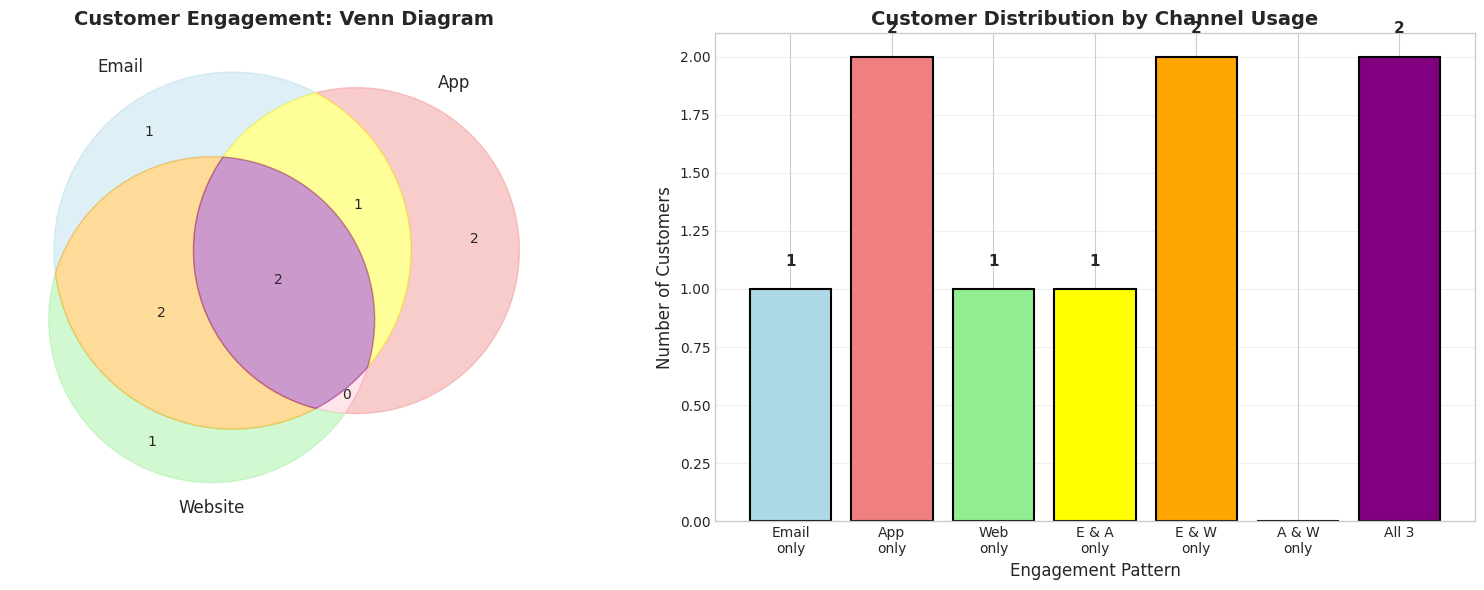

In [192]:
# Visualization: Customer engagement across channels
from matplotlib_venn import venn3

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Venn diagram
v = venn3([E, A, W], set_labels=('Email', 'App', 'Website'), ax=axes[0])
v.get_patch_by_id('100').set_color('lightblue')
v.get_patch_by_id('010').set_color('lightcoral')
v.get_patch_by_id('001').set_color('lightgreen')
v.get_patch_by_id('110').set_color('yellow')
v.get_patch_by_id('101').set_color('orange')
v.get_patch_by_id('011').set_color('pink')
v.get_patch_by_id('111').set_color('purple')
axes[0].set_title('Customer Engagement: Venn Diagram', fontsize=14, fontweight='bold')

# Engagement bar chart
categories = ['Email\nonly', 'App\nonly', 'Web\nonly', 
              'E & A\nonly', 'E & W\nonly', 'A & W\nonly', 'All 3']
counts = [len(E - A - W), len(A - E - W), len(W - E - A),
          len(email_app_only), len(email_web_only), len(app_web_only), len(all_three)]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'yellow', 'orange', 'pink', 'purple']

axes[1].bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Engagement Pattern', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Customer Distribution by Channel Usage', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, count in enumerate(counts):
    if count > 0:
        axes[1].text(i, count + 0.1, str(count), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Summary & Key Takeaways

### 📚 Core Concepts Mastered

#### 1. **Set Theory**
- Sets are collections of distinct objects
- Operations: Union (∪), Intersection (∩), Difference (-), Complement, Symmetric Difference (△)
- Applications: Data deduplication, filtering, customer segmentation

#### 2. **Relations**
- A relation R from A to B is a subset of A × B
- **Reflexive**: Every element relates to itself
- **Symmetric**: If aRb then bRa
- **Transitive**: If aRb and bRc then aRc
- **Equivalence Relation**: Reflexive + Symmetric + Transitive

#### 3. **Functions**
- Special relations where each input maps to exactly one output
- **Injective (One-to-One)**: Different inputs → different outputs
- **Surjective (Onto)**: Every output has at least one input
- **Bijective**: Both injective and surjective (has inverse)
- **Composition**: $(g \circ f)(x) = g(f(x))$ (generally not commutative)

#### 4. **Inverse Functions**
- $f^{-1}$ reverses the mapping of $f$
- Requires function to be bijective
- Properties: $f(f^{-1}(x)) = x$ and $f^{-1}(f(x)) = x$
- Graph is reflection across line $y = x$

### 🔑 Key Formulas & Definitions

#### **Set Operations**
$$A \cup B = \{x \mid x \in A \text{ or } x \in B\}$$
$$A \cap B = \{x \mid x \in A \text{ and } x \in B\}$$
$$A - B = \{x \mid x \in A \text{ and } x \notin B\}$$
$$A^c = \{x \mid x \notin A\}$$
$$A \triangle B = (A - B) \cup (B - A)$$

#### **Cardinality**
$$|A \cup B| = |A| + |B| - |A \cap B|$$
$$|A \times B| = |A| \times |B|$$

#### **Function Properties**
- **Injective**: $f(x_1) = f(x_2) \Rightarrow x_1 = x_2$
- **Surjective**: $\forall y \in B, \exists x \in A: f(x) = y$
- **Bijective**: Injective AND Surjective

#### **Composition**
$$(g \circ f)(x) = g(f(x))$$

Inverse of composition (order reverses):
$$(f \circ g)^{-1} = g^{-1} \circ f^{-1}$$

#### **Inverse**
$$f^{-1}(y) = x \iff f(x) = y$$
$$f(f^{-1}(x)) = x \text{ and } f^{-1}(f(x)) = x$$

### 🎯 Data Science Applications

| Concept | Application | Example |
|---------|-------------|---------|
| **Sets** | Data cleaning | Remove duplicates, filter records |
| **Union** | Merge datasets | Combine customer lists |
| **Intersection** | Common analysis | Find repeat customers |
| **Relations** | Network analysis | Social graphs, recommendations |
| **Equivalence Relations** | Clustering | Group similar items |
| **Functions** | Feature engineering | Transform input features |
| **Composition** | ML pipelines | Chain transformations |
| **Inverse Functions** | Normalization | Scale and reverse-scale data |
| **Hash Functions** | Lookups | Fast dictionary access |
| **Graph Relations** | Algorithms | BFS, DFS, shortest paths |

### 💡 Key Insights

1. **Mathematical Foundation**: Data structures are built on set theory, relations, and functions
2. **Function Composition**: Core to ML pipelines (preprocessing → model → postprocessing)
3. **Bijective = Invertible**: Only bijective functions have inverses (important for encoders)
4. **Relations Model Connections**: Graphs, networks, and relationships
5. **Set Operations = SQL**: Database queries use set theory extensively

### ⚠️ Common Pitfalls

1. **Composition Order**: $f \circ g \neq g \circ f$ (not commutative!)
2. **Inverse Requirements**: Not all functions have inverses (must be bijective)
3. **Domain Restrictions**: Be careful with undefined values (e.g., division by zero)
4. **Relation vs Function**: All functions are relations, but not all relations are functions
5. **Set vs Multiset**: Sets don't allow duplicates; use multisets if needed

### 🚀 Next Week Preview

**Week 2: Coordinate Systems and Straight Lines**
- Rectangular coordinate system
- Slope, parallel and perpendicular lines
- Equations of lines
- Distance and midpoint formulas
- Linear regression (straight-line fit)

### 🎓 Self-Assessment Checklist

Check your understanding:
- [ ] Can perform all set operations (∪, ∩, -, complement, △)
- [ ] Can determine if a relation is reflexive, symmetric, or transitive
- [ ] Can identify injective, surjective, and bijective functions
- [ ] Can compose functions: $(g \circ f)(x)$
- [ ] Can find inverse functions algebraically
- [ ] Can verify inverse: $f(f^{-1}(x)) = x$
- [ ] Understand Venn diagrams and adjacency matrices
- [ ] Can apply concepts to data science problems
- [ ] Can implement set operations in Python
- [ ] Can visualize functions and their properties

---

**📖 Study Tips**:
- Practice drawing Venn diagrams for complex set operations
- Test relation properties systematically (reflexive, symmetric, transitive)
- Always verify inverses both ways: $f \circ f^{-1}$ AND $f^{-1} \circ f$
- Visualize functions graphically to understand injectivity and surjectivity
- Connect mathematical concepts to real data science applications

**🔗 Related Topics**:
- Set Theory → Database Design (SQL)
- Relations → Graph Theory (Week 10-11)
- Functions → Calculus (Week 7-9)
- Inverse Functions → Linear Algebra (transformations)

---
**🎓 End of Week 1: Set Theory, Relations and Functions**

**Total Cells**: 16 (8 markdown + 8 code)  
**Visualizations**: 15+ plots and diagrams  
**Worked Examples**: 10+ comprehensive examples  
**Practice Problems**: 3 multi-part problems with full solutions